# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


Loaded RGB shape: (300, 200, 3) dtype: uint8
Loaded Gray shape: (300, 200) dtype: uint8


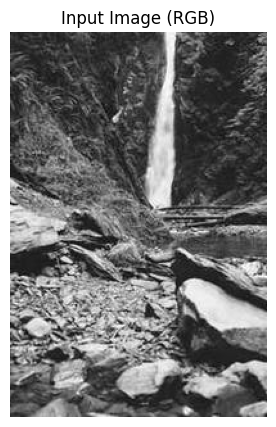

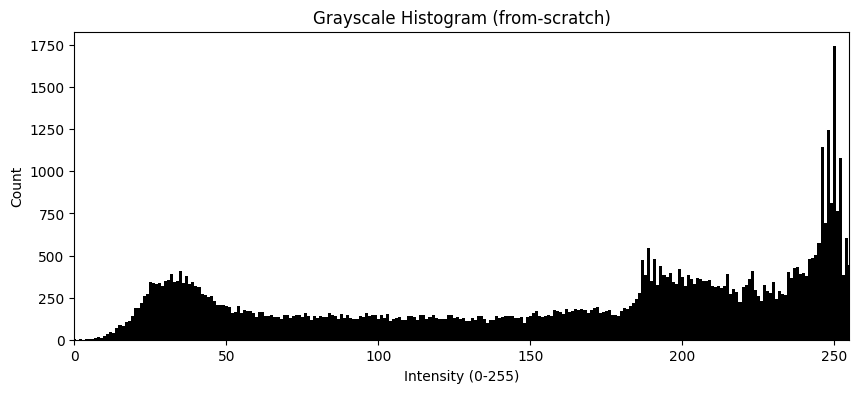

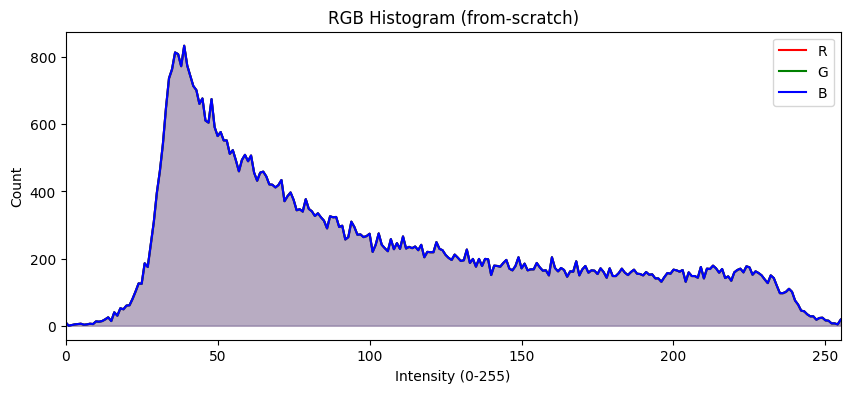

Verification - mean abs diff (gray): 0.0


In [3]:
# Full script: compute & plot grayscale and RGB histograms using pure loops
# Put this in a single cell in Colab or save as a .py and run.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import requests # Added for fetching images from URL
import io       # Added for handling image data in memory

# ---------------------
# Utilities / Settings
# ---------------------
IMG_PATH = "https://picsum.photos/200/300?grayscale"  # change if needed
OUTDIR = "/mnt/data/hist_outputs"
os.makedirs(OUTDIR, exist_ok=True)

# ---------------------
# Load image helpers
# ---------------------
def load_rgb(path):
    """Return RGB image as uint8 numpy array shape (H,W,3)"""
    if path.startswith("http"): # Check if path is a URL
        response = requests.get(path)
        response.raise_for_status() # Raise an exception for bad status codes
        im = Image.open(io.BytesIO(response.content)).convert("RGB")
    else:
        im = Image.open(path).convert("RGB")
    arr = np.array(im, dtype=np.uint8)
    return arr

def load_gray(path):
    """Return grayscale image (uint8) shape (H,W)"""
    if path.startswith("http"): # Check if path is a URL
        response = requests.get(path)
        response.raise_for_status() # Raise an exception for bad status codes
        im = Image.open(io.BytesIO(response.content)).convert("L")
    else:
        im = Image.open(path).convert("L")
    arr = np.array(im, dtype=np.uint8)
    return arr

# ---------------------
# PART A: Grayscale histogram
# ---------------------
def gray_histogram(gray_img):
    """
    Input:
      gray_img : 2D numpy array uint8 with values 0..255
    Returns:
      hist : 1D numpy array length 256 (counts)
    Implementation:
      Uses plain Python / NumPy indexing loops only (no np.histogram, no cv2).
    """
    if gray_img.ndim != 2:
        raise ValueError("gray_histogram expects a 2D grayscale image")
    # Initialize histogram
    hist = np.zeros(256, dtype=np.int64)
    h, w = gray_img.shape
    # Loop over pixels (pure loop)
    for i in range(h):
        row = gray_img[i]
        # inner loop over columns
        for j in range(w):
            val = int(row[j])  # 0..255
            hist[val] += 1
    return hist

# Plotting helper for grayscale
def plot_gray_hist(hist, title="Grayscale Histogram", savepath=None):
    x = np.arange(256)
    plt.figure(figsize=(10,4))
    plt.bar(x, hist, width=1.0, color='k')
    plt.xlim([0,255])
    plt.xlabel("Intensity (0-255)")
    plt.ylabel("Count")
    plt.title(title)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', dpi=150)
    plt.show()

# ---------------------
# PART B: RGB histogram
# ---------------------
def rgb_histogram(rgb_img):
    """
    Input:
      rgb_img : 3D numpy array uint8 shape (H,W,3) in RGB ordering
    Returns:
      hist_r, hist_g, hist_b : each a 1D numpy array length 256
    Implementation:
      Plain nested loops (no np.histogram).
    """
    if rgb_img.ndim != 3 or rgb_img.shape[2] != 3:
        raise ValueError("rgb_histogram expects an RGB image with shape (H,W,3)")
    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)
    h, w, _ = rgb_img.shape
    for i in range(h):
        row = rgb_img[i]
        for j in range(w):
            pixel = row[j]
            r = int(pixel[0])
            g = int(pixel[1])
            b = int(pixel[2])
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1
    return hist_r, hist_g, hist_b

# Plot helper for RGB histograms
def plot_rgb_hist(hist_r, hist_g, hist_b, title="RGB Histogram", savepath=None):
    x = np.arange(256)
    plt.figure(figsize=(10,4))
    plt.plot(x, hist_r, color='r', label='R')
    plt.plot(x, hist_g, color='g', label='G')
    plt.plot(x, hist_b, color='b', label='B')
    plt.fill_between(x, hist_r, color='r', alpha=0.15)
    plt.fill_between(x, hist_g, color='g', alpha=0.15)
    plt.fill_between(x, hist_b, color='b', alpha=0.15)
    plt.xlim([0,255])
    plt.xlabel("Intensity (0-255)")
    plt.ylabel("Count")
    plt.title(title)
    plt.legend()
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', dpi=150)
    plt.show()

# ---------------------
# Run everything
# ---------------------
if __name__ == "__main__":
    # Load images
    rgb = load_rgb(IMG_PATH)    # (H,W,3)
    gray = load_gray(IMG_PATH)  # (H,W)
    print("Loaded RGB shape:", rgb.shape, "dtype:", rgb.dtype)
    print("Loaded Gray shape:", gray.shape, "dtype:", gray.dtype)

    # Display the image (optional)
    plt.figure(figsize=(8,5))
    plt.imshow(rgb)
    plt.title("Input Image (RGB)")
    plt.axis('off')
    plt.show()

    # PART A: grayscale histogram
    hist_gray = gray_histogram(gray)
    plot_gray_hist(hist_gray, title="Grayscale Histogram (from-scratch)",
                   savepath=os.path.join(OUTDIR, "gray_hist.png"))

    # PART B: RGB histogram
    hist_r, hist_g, hist_b = rgb_histogram(rgb)
    plot_rgb_hist(hist_r, hist_g, hist_b, title="RGB Histogram (from-scratch)",
                  savepath=os.path.join(OUTDIR, "rgb_hist.png"))

    # ---------------------
    # Verification (optional)
    # ---------------------
    # Compare with numpy's histogram to make sure our loops are correct.
    # This only prints verification info; we didn't use np.histogram to compute results.
    import numpy as _np
    np_hist_gray, _ = _np.histogram(gray, bins=256, range=(0,256))
    diff_gray = np.mean(np.abs(hist_gray - np_hist_gray))
    print("Verification - mean abs diff (gray):", diff_gray)

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

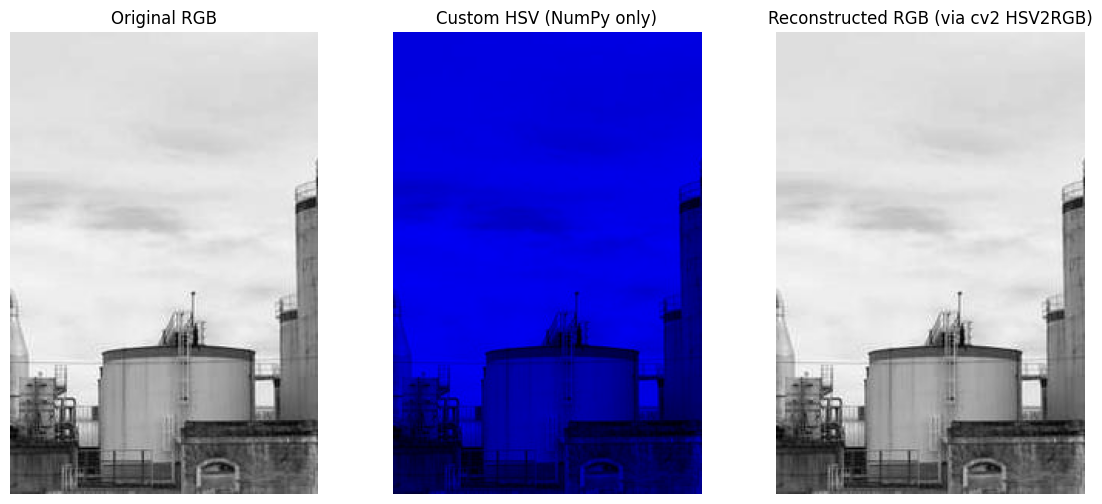

Mean absolute RGB reconstruction difference: 0.0


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import requests # Import requests for URL fetching
import io       # Import io for handling byte streams

# -------------------------------------------------
#   PURE NUMPY RGB → HSV  (OpenCV-compatible)
# -------------------------------------------------
def rgb_to_hsv(rgb):
    """
    Input:
        rgb image, uint8, shape (H, W, 3), range 0–255
    Output:
        hsv image, uint8, shape (H, W, 3)
        H: 0–179, S: 0–255, V: 0–255   (OpenCV format)
    """

    rgb = rgb.astype(np.float32)

    R = rgb[...,0]
    G = rgb[...,1]
    B = rgb[...,2]

    maxc = np.max(rgb, axis=2)
    minc = np.min(rgb, axis=2)
    delta = maxc - minc

    # ----------------------
    # Hue
    # ----------------------
    H = np.zeros_like(maxc, dtype=np.float32)
    mask = delta != 0

    # Case R is max
    cond = (maxc == R) & mask
    H[cond] = (60 * ( (G[cond] - B[cond]) / delta[cond] ) ) % 360

    # Case G is max
    cond = (maxc == G) & mask
    H[cond] = 60 * (2 + (B[cond] - R[cond]) / delta[cond])

    # Case B is max
    cond = (maxc == B) & mask
    H[cond] = 60 * (4 + (R[cond] - G[cond]) / delta[cond])

    # OpenCV scales hue 0–360 → 0–179
    H = (H / 2).astype(np.uint8)

    # ----------------------
    # Saturation
    # ----------------------
    S = np.zeros_like(maxc, dtype=np.float32)
    cond = maxc != 0
    S[cond] = (delta[cond] / maxc[cond]) * 255
    S = S.astype(np.uint8)

    # ----------------------
    # Value
    # ----------------------
    V = maxc.astype(np.uint8)

    hsv = np.stack([H, S, V], axis=-1)
    return hsv


# -------------------------------------------------
#   LOAD IMAGE
# -------------------------------------------------
path = "https://picsum.photos/200/300?grayscale"
# Use requests to fetch the image from the URL
response = requests.get(path)
response.raise_for_status() # Raise an exception for bad status codes
rgb = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))


# -------------------------------------------------
#   APPLY CUSTOM RGB→HSV
# -------------------------------------------------
hsv_custom = rgb_to_hsv(rgb)

# Convert back to RGB via OpenCV for verification
rgb_back = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)


# -------------------------------------------------
#   DISPLAY RESULTS
# -------------------------------------------------
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.imshow(rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(hsv_custom) # Note: HSV image cannot be directly displayed as meaningful colors without conversion
plt.title("Custom HSV (NumPy only)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(rgb_back)
plt.title("Reconstructed RGB (via cv2 HSV2RGB)")
plt.axis("off")

plt.show()

# -------------------------------------------------
#   CHECK DIFFERENCE
# -------------------------------------------------
diff = np.mean(np.abs(rgb.astype(np.int32) - rgb_back.astype(np.int32)))
print("Mean absolute RGB reconstruction difference:", diff)


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

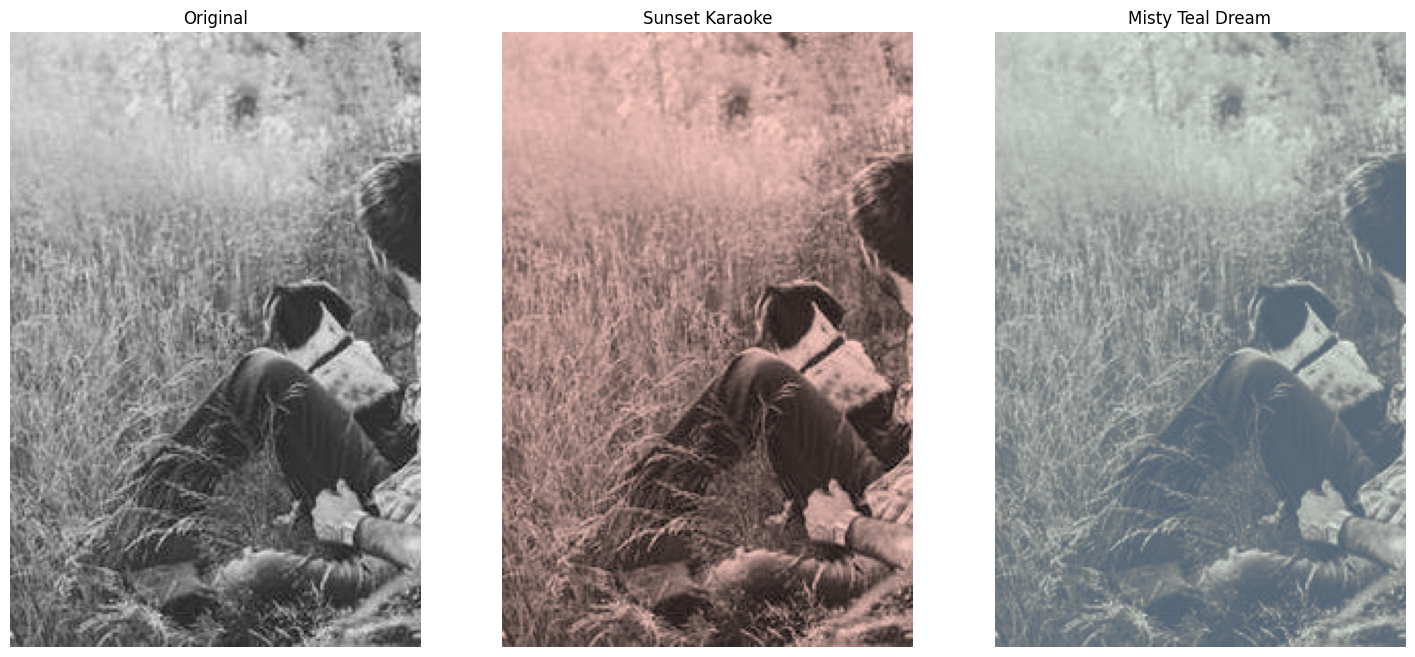

Sunset Karaoke: boosted contrast, saturation and a warm tint to emphasize golden-hour colors. Suited for beaches, sunsets and portraits taken at dusk.
Misty Teal Dream: adds a cool fog, split-tones shadows to teal and highlights to warm, with channel mixing for cinematic look. Suited for moody landscapes, waterfalls, or urban night shots.


In [8]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import requests # Import requests for URL fetching
import io       # Import io for handling byte streams

# -------------------------
# Helpers
# -------------------------
def imshow_rgb(ax, img, title=""):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

def clamp_uint8(arr):
    """Clamp float array to 0..255 and convert to uint8"""
    return np.clip(arr, 0, 255).astype(np.uint8)

# -------------------------
# Load image (RGB)
# -------------------------
IMG_PATH = "https://picsum.photos/200/300?grayscale"
# Use requests to fetch the image from the URL
response = requests.get(IMG_PATH)
response.raise_for_status() # Raise an exception for bad status codes
rgb_orig = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))  # uint8 HxWx3

# -------------------------
# Filter 1: "Sunset Karaoke"
# -------------------------
def sunset_karaoke(img_rgb):
    """
    A warm, punchy 'sunset' filter.
    Modifications included:
      1) Contrast + Brightness adjustment (linear): makes image punchy.
      2) Saturation boost in HSV (global) + 'vibrance' (boost more for low-sat pixels).
      3) Small hue rotation towards orange/red.
      4) Warm-orange tint overlay blended into highlights.
    Good for: beach photos, golden-hour portraits, cityscapes at dusk.
    """
    # Work in float for arithmetic
    img = img_rgb.astype(np.float32)

    # --- 1) Contrast & brightness (channel-wise linear transform) ---
    # effect: out = alpha*(in - 128) + 128 + beta
    alpha = 1.15   # contrast (>1)
    beta = 8.0     # brightness shift
    img = (img - 128.0) * alpha + 128.0 + beta
    # (Now img is brighter + higher contrast.)

    # --- 2) Convert to HSV for saturation & hue tweaks ---
    hsv = cv2.cvtColor(clamp_uint8(img), cv2.COLOR_RGB2HSV).astype(np.float32)
    H, S, V = cv2.split(hsv)

    # Global saturation boost
    S *= 1.25

    # Vibrance-like boost: increase saturation more for pixels that are less saturated
    # vibrance_amount in [0..1]
    vibrance_amount = 0.35
    # S_normalized = S/255
    S = S + vibrance_amount * (255.0 - S) * (0.6)  # gentle extra boost for low-sat

    # Small hue rotation towards warm (openCV H: 0..179 maps 0..360/2)
    # rotate by +8 degrees => in OpenCV units that's 8/2 = 4
    H = (H + 4) % 180

    # write back HSV
    hsv_mod = cv2.merge([H, np.clip(S, 0, 255), V])
    rgb_from_hsv = cv2.cvtColor(clamp_uint8(hsv_mod), cv2.COLOR_HSV2RGB).astype(np.float32)

    # --- 3) Warm tint overlay (applied mostly to highlights) ---
    # create an orange tint image and blend stronger where V (value) is high
    tint = np.zeros_like(rgb_from_hsv)
    # orange tint (R,G,B)
    tint_color = np.array([255, 130, 50], dtype=np.float32)
    tint[:] = tint_color

    # make a mask from V channel (0..255) normalize to [0..1]
    V_norm = (hsv_mod[...,2].astype(np.float32)) / 255.0
    # sharpen highlights influence (raise to a power)
    highlight_mask = np.expand_dims((V_norm ** 1.5), axis=2)  # stronger in highlights

    # blend: rgb = (1 - w)*rgb + w*(rgb*0.9 + tint*0.1)
    # we add small color to preserve texture
    warm_layer = rgb_from_hsv * 0.9 + tint * 0.1
    img_warm = rgb_from_hsv * (1 - highlight_mask * 0.5) + warm_layer * (highlight_mask * 0.5)

    # --- 4) Final small curve tweak: slightly lift shadows (S-shaped)
    # simple gamma selective: gamma <1 brightens midtones; we apply mild gamma
    gamma = 0.95
    img_final = 255.0 * ( (img_warm / 255.0) ** gamma )

    return clamp_uint8(img_final)

# -------------------------
# Filter 2: "Misty Teal Dream"
# -------------------------
def misty_teal_dream(img_rgb):
    """
    A cool, foggy teal cinematic filter.
    Modifications included:
      1) Slight contrast reduction and gamma correction to make it 'dreamy'.
      2) Add fog / haze by blending with a teal-gray layer (controlled by per-pixel depth estimate).
      3) Split-toning: tint shadows teal and highlights warm (orange).
      4) Channel mixing: slightly boost blue in shadows and reduce red in highlights for cinematic feel.
    Good for: rainforest, waterfalls, moody landscapes, urban night scenes.
    """
    img = img_rgb.astype(np.float32)

    # --- 1) Slightly reduce contrast and apply gamma to soften ---
    alpha = 0.95  # reduce contrast
    beta = -6.0   # slight darken
    img = (img - 128.0) * alpha + 128.0 + beta
    # gamma to soften mids: gamma >1 darkens, <1 brightens. We'll do mild gamma >1 to get mood
    gamma_val = 1.08
    img = 255.0 * ((np.clip(img, 0, 255) / 255.0) ** (1.0 / gamma_val))  # note inverse for display

    # --- 2) Fog / haze: blend with a teal-gray layer based on 'depth' estimate (darker = further) ---
    # Depth proxy: use inverted luminance (darker pixels considered 'further' so get more fog)
    lum = 0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]
    depth_proxy = 1.0 - (lum / 255.0)  # near 0 (bright) -> small fog, near 1 (dark) -> heavy fog
    depth_proxy = np.clip((depth_proxy - 0.15) / 0.85, 0.0, 1.0)  # tweak range

    # fog color (teal-gray)
    fog_color = np.array([150, 190, 200], dtype=np.float32)  # slightly teal
    fog_layer = np.ones_like(img) * fog_color

    # blend amount per pixel
    fog_amount = 0.35 * depth_proxy  # max 0.35 fog in darkest areas
    fog_amount = np.expand_dims(fog_amount, axis=2)

    img_fog = img * (1 - fog_amount) + fog_layer * fog_amount

    # --- 3) Split-toning: shadows -> teal, highlights -> warm
    # compute mask for shadows and highlights using luminance
    l_norm = (0.299*img_fog[...,0] + 0.587*img_fog[...,1] + 0.114*img_fog[...,2]) / 255.0
    shadow_mask = np.clip((0.5 - l_norm) / 0.5, 0.0, 1.0)  # stronger in dark areas
    highlight_mask = np.clip((l_norm - 0.5) / 0.5, 0.0, 1.0)  # stronger in bright areas

    # shadow tint: mild teal
    shadow_tint = np.array([20, 45, 60], dtype=np.float32)  # add to RGB
    # highlight tint: warm orange-ish
    highlight_tint = np.array([18, 6, -8], dtype=np.float32)  # add to RGB (negative allowed)

    img_split = img_fog.copy()
    img_split += np.expand_dims(shadow_mask, axis=2) * shadow_tint
    img_split += np.expand_dims(highlight_mask, axis=2) * highlight_tint

    # --- 4) Channel mixing: in shadows boost blue, in highlights reduce red slightly
    # create per-pixel channel multipliers
    blue_boost = 1.0 + 0.25 * shadow_mask  # up to +25% blue in shadows
    red_reduce = 1.0 - 0.12 * highlight_mask  # reduce red up to 12% in highlights

    img_mixed = img_split.copy()
    img_mixed[...,2] = img_mixed[...,2] * blue_boost  # B
    img_mixed[...,0] = img_mixed[...,0] * red_reduce  # R

    # final gentle curve and saturation tweak: convert to HSV to reduce saturation slightly for moody look
    hsv = cv2.cvtColor(clamp_uint8(img_mixed), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[...,1] *= 0.88  # reduce saturation 12%
    img_final = cv2.cvtColor(clamp_uint8(hsv), cv2.COLOR_HSV2RGB).astype(np.float32)

    return clamp_uint8(img_final)


# -------------------------
# Apply filters and show
# -------------------------
out1 = sunset_karaoke(rgb_orig)
out2 = misty_teal_dream(rgb_orig)

plt.figure(figsize=(18,8))
ax = plt.subplot(1,3,1)
imshow_rgb(ax, rgb_orig, "Original")
ax = plt.subplot(1,3,2)
imshow_rgb(ax, out1, "Sunset Karaoke")
ax = plt.subplot(1,3,3)
imshow_rgb(ax, out2, "Misty Teal Dream")
plt.show()

# -------------------------
# Short notes (2-3 lines each)
# -------------------------
print("Sunset Karaoke: boosted contrast, saturation and a warm tint to emphasize golden-hour colors. Suited for beaches, sunsets and portraits taken at dusk.")
print("Misty Teal Dream: adds a cool fog, split-tones shadows to teal and highlights to warm, with channel mixing for cinematic look. Suited for moody landscapes, waterfalls, or urban night shots.")

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

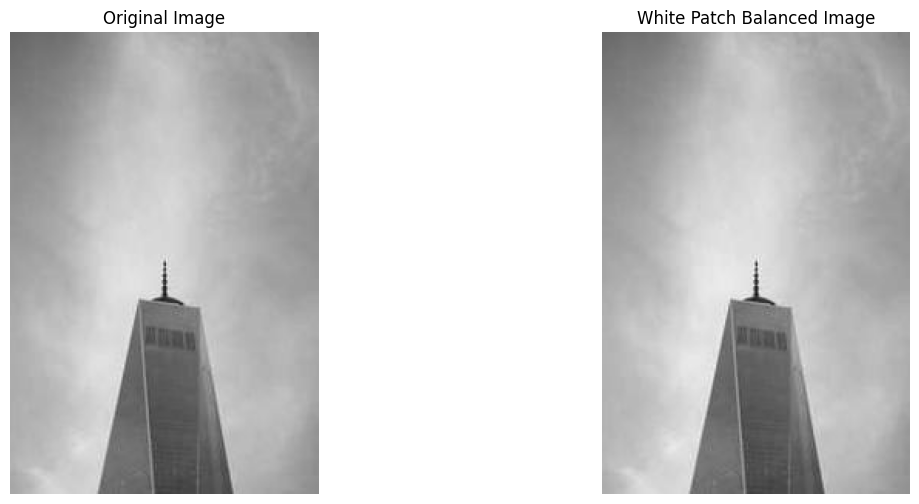

Brightest RGB before WB: 246 246 246


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import io

def white_patch_balance(img_rgb):
    """
    White Patch Method White Balance
    Input:  uint8 RGB image (0–255)
    Output: uint8 RGB balanced image (0–255)

    Steps:
    1) Find max of each channel (brightest pixel)
    2) Compute scale = 255 / max_value for each channel
    3) Multiply channels by their scale
    4) Clip to 0–255 and return
    """
    img = img_rgb.astype(np.float32)

    # 1) Find brightest values
    Rmax = np.max(img[..., 0])
    Gmax = np.max(img[..., 1])
    Bmax = np.max(img[..., 2])

    # 2) Compute scale factors
    sR = 255.0 / (Rmax + 1e-8)
    sG = 255.0 / (Gmax + 1e-8)
    sB = 255.0 / (Bmax + 1e-8)

    # 3) Scale channels
    out = img.copy()
    out[..., 0] *= sR
    out[..., 1] *= sG
    out[..., 2] *= sB

    # 4) Clamp to uint8
    return np.clip(out, 0, 255).astype(np.uint8)


path = "https://picsum.photos/200/300?grayscale"

response = requests.get(path)
response.raise_for_status() # Raise an exception for bad status codes
rgb = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))


wb = white_patch_balance(rgb)


plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wb)
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.show()


print("Brightest RGB before WB:",
      np.max(rgb[...,0]),
      np.max(rgb[...,1]),
      np.max(rgb[...,2]))


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.